# Prefect - workflow management system
### common uses
- define set of tasks
- execute tasks (on schedule)
- handle retries, logging

In [8]:
# Imports and setup

from prefect import task, Flow, Parameter
from prefect.schedules import IntervalSchedule
import datetime
import methods as m

sourcef, targetf = "values.csv", "newvalues.csv"

# define ETL tasks

## Extract 
@task
def extract(path):
    return m.extract(path)

## Transform 
@task
def transform(data):
    return m.transform(data)

## Load
@task
def load(data, path):
    return m.load(data, path)

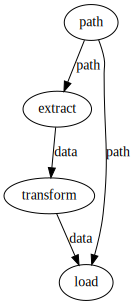

In [11]:
def build_flow(schedule=None):
    with Flow("my_etl", schedule=schedule) as flow:
        path = Parameter(name="path", required=True)
        data = extract(path)
        newdata = transform(data)
        result = load(newdata, path)
    return flow

schedule = IntervalSchedule(
    start_date=datetime.datetime.now() + datetime.timedelta(seconds=1), 
    interval=datetime.timedelta(seconds=5)
)

flow = build_flow(schedule)

# (successfully ran)

# flow.run(parameters={
#     "path":"values.csv"
# })

flow.visualize()